In [1]:
# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np  
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder

# **Preprocessing** 

# Data Overview

In [3]:
# 1. Read data
data = pd.read_csv("/kaggle/input/employees-evaluation-for-promotion/employee_promotion.csv")


# Display first and last five instances of dataset

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [5]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


**Columns names**

In [7]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


# Datatypes of Dataset

In [9]:
# 2. Data types
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

# Dataset Shape Before Any Changes

In [10]:
data.shape

(54808, 13)

# Number of NaN at Dataset

In [11]:
np.sum(data.isnull().any(axis=1))

8428

In [12]:
# Detect rows that contains null values (NaN) 

data.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
avg_training_score      2560
education               2409
employee_id                0
department                 0
gender                     0
region                     0
no_of_trainings            0
recruitment_channel        0
age                        0
length_of_service          0
awards_won                 0
is_promoted                0
dtype: int64

In [13]:
# Precentage of columns in each row

for column in data.columns:
    precentage = data[column].isnull().mean()
    print(column + ": "+ str(round(precentage * 100,2)))

employee_id: 0.0
department: 0.0
region: 0.0
education: 4.4
gender: 0.0
recruitment_channel: 0.0
no_of_trainings: 0.0
age: 0.0
previous_year_rating: 7.52
length_of_service: 0.0
awards_won: 0.0
avg_training_score: 4.67
is_promoted: 0.0


# Deals With NaN Values

In [14]:
diretor_prev_year = data[data['previous_year_rating'].isnull()].index
data.drop(diretor_prev_year, axis = 0, inplace = True)

In [15]:
# Delete any duplicate rows if exist

data = data.drop_duplicates()
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [16]:
data[data['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57.0,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,48.0,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,48.0,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,53.0,0
87,69094,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,49.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,53.0,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,86.0,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,53.0,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47.0,0


In [17]:
# Fill 'education' column with the most common value 
"""
1) use mode() with catogerical datatypes
2) fillna() can not accebt obj -just deals with int/str- -> join() the obj
3) Replace NaN using fillna()
 
"""

education_mode = ''.join(data['education'].mode()) #convert to str (it was obj))

data['education'].fillna(education_mode, inplace = True)

/tmp/ipykernel_23/2188245210.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna(education_mode, inplace = True)


In [ ]:
# Fill 'avg_training_score' column with median
"""
1) use median() with numirecal datatypes
2) Replace NaN using fillna()

"""

avg_train_median = data['avg_training_score'].median()

data['avg_training_score'].fillna(avg_train_median, inplace = True)

/tmp/ipykernel_23/460709364.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_training_score'].fillna(avg_train_median, inplace = True)


**Check the mean of NaN after dealing with it**

In [19]:
data.isnull().mean()

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
awards_won              0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

# Detect and Remove Outliers 

In [20]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [21]:
# Remove outliers using 1.5*IQR
numerical_columns = [
    "no_of_trainings",
    "age",
    "previous_year_rating",
    "length_of_service",
    "avg_training_score",
]

def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Apply outlier removal
data_cleaned = remove_outliers_iqr(data, numerical_columns)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


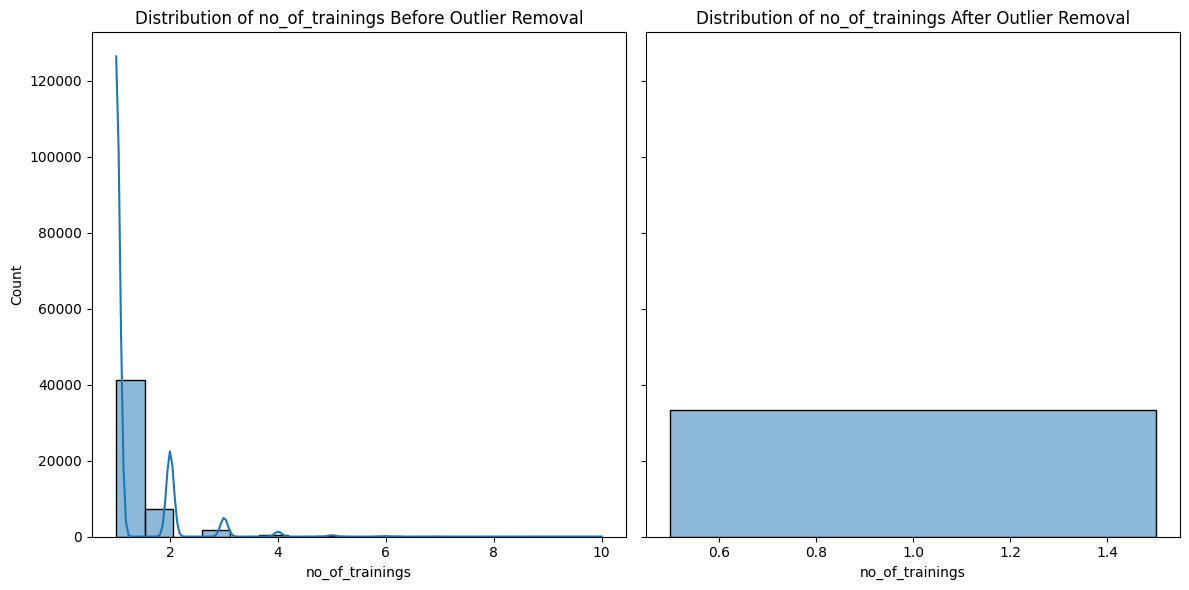

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


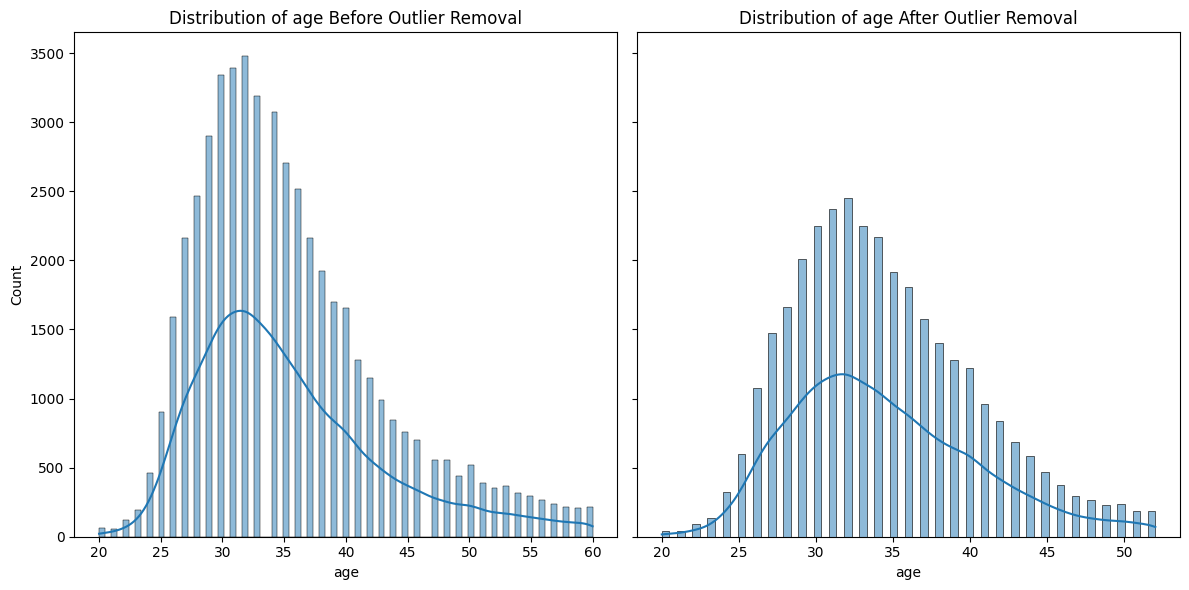

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


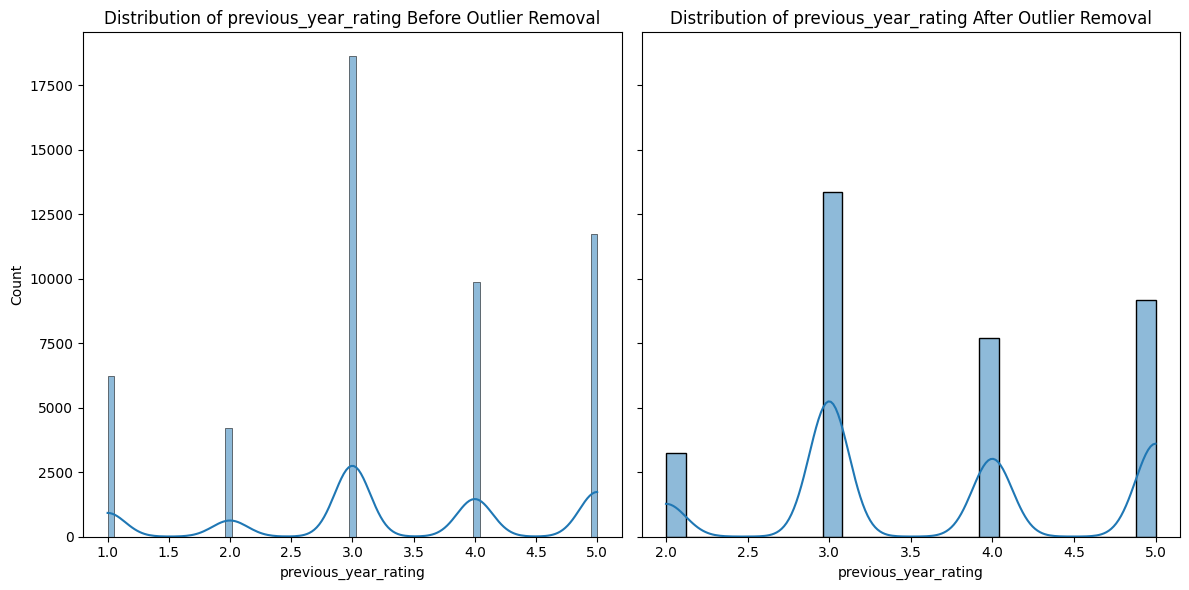

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


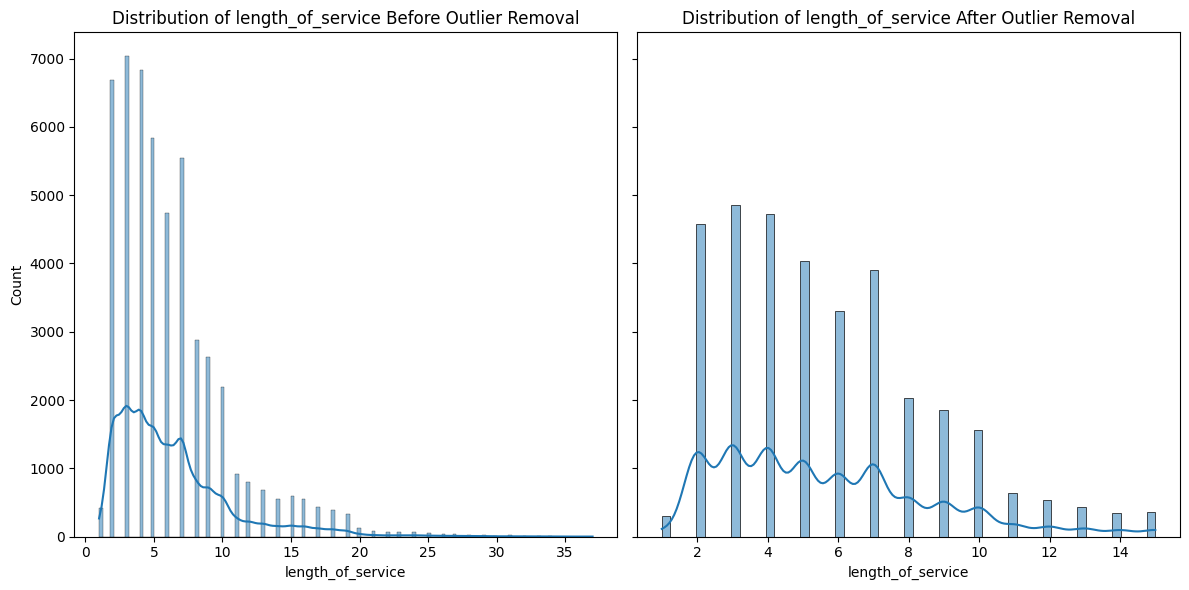

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


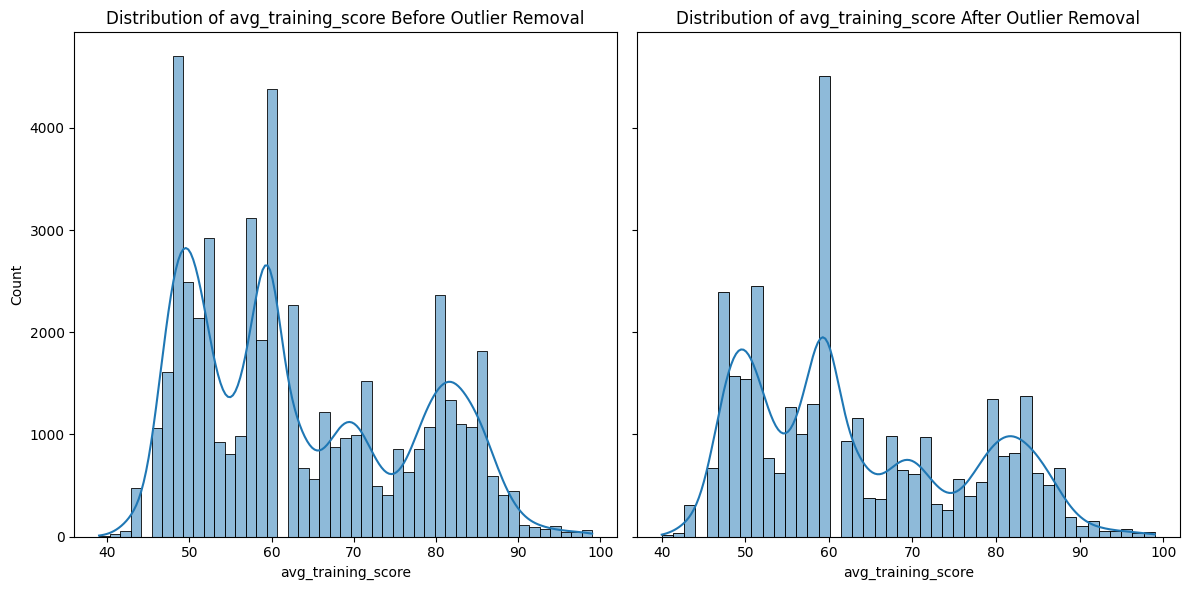

In [22]:
# Visualize distributions of numerical columns before and after outlier removal
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    # Before outlier removal
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col} Before Outlier Removal')
    
    # After outlier removal
    sns.histplot(data_cleaned[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col} After Outlier Removal')
    
    plt.tight_layout()
    plt.show()

# Conver Categorical Columns To Numarical

**Create a new copy of the data cleanded**

In [23]:
data_encoding = pd.DataFrame(data)

**1. Convet gender column**

In [25]:
 #convert the gender column to numaric value 

"""
 0 --> m
 1 --> f
"""
convert = {"gender": {"m": 0, "f": 1}}#convert "Female" to 1 and "Male" to 0
data_encoding = data_encoding.replace(convert) #replace the values in the dataset
data_encoding #display the dataSet after change

/tmp/ipykernel_23/1957309678.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoding = data_encoding.replace(convert) #replace the values in the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,1,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,0,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,0,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,0,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,0,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,0,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,1,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,0,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,0,sourcing,1,29,1.0,2,0,60.0,0


**Check the type of gender column**

In [26]:
data_encoding["gender"].dtypes

dtype('int64')

**2. Convet department column**

In [27]:
 #convert the department column to numaric value 
"""

R&D -->  0  
Legal --> 1  
 HR —> 2  
 Finance --> 3 
 Analytics --> 4 
Procurement --> 5 
 Technology --> 6
Operations --> 7
 Sales & Marketing --> 8
"""
convert = {"department": {"R&D" : 0 , "Legal" : 1 ,  "HR" : 2 ,  "Finance" : 3 , "Analytics" : 4 
                          , "Procurement" : 5  , "Technology" : 6
                          ,"Operations": 7 , "Sales & Marketing" : 8}}#convert "Female" to 1 and "Male" to 0
data_encoding = data_encoding.replace(convert) #replace the values in the dataset
data_encoding #display the dataSet after change

/tmp/ipykernel_23/1534938552.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoding = data_encoding.replace(convert) #replace the values in the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,8,region_7,Master's & above,1,sourcing,1,35,5.0,8,0,49.0,0
1,65141,7,region_22,Bachelor's,0,other,1,30,5.0,4,0,60.0,0
2,7513,8,region_19,Bachelor's,0,sourcing,1,34,3.0,7,0,50.0,0
3,2542,8,region_23,Bachelor's,0,other,2,39,1.0,10,0,50.0,0
4,48945,6,region_26,Bachelor's,0,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,6,region_14,Bachelor's,0,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,7,region_27,Master's & above,1,other,1,37,2.0,6,0,56.0,0
54805,13918,4,region_1,Bachelor's,0,other,1,27,5.0,3,0,79.0,0
54806,13614,8,region_9,Bachelor's,0,sourcing,1,29,1.0,2,0,60.0,0


**Check the type of department column**

In [28]:
data_encoding["department"].dtypes

dtype('int64')

**3. Convet education column**

In [29]:
 #convert the education column to numaric value 
"""
 0 --> Below Secondary
 1 --> Bachelor's
 2 --> Master's & above
"""
convert = {"education": {"Below Secondary": 0, "Bachelor's": 1, "Master's & above" :2}}#convert" "Female" to 1 and "Male" to 0
data_encoding = data_encoding.replace(convert) #replace the values in the dataset
data_encoding #display the dataSet after change

/tmp/ipykernel_23/1287198882.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoding = data_encoding.replace(convert) #replace the values in the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,8,region_7,2,1,sourcing,1,35,5.0,8,0,49.0,0
1,65141,7,region_22,1,0,other,1,30,5.0,4,0,60.0,0
2,7513,8,region_19,1,0,sourcing,1,34,3.0,7,0,50.0,0
3,2542,8,region_23,1,0,other,2,39,1.0,10,0,50.0,0
4,48945,6,region_26,1,0,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,6,region_14,1,0,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,7,region_27,2,1,other,1,37,2.0,6,0,56.0,0
54805,13918,4,region_1,1,0,other,1,27,5.0,3,0,79.0,0
54806,13614,8,region_9,1,0,sourcing,1,29,1.0,2,0,60.0,0


**Check the type of education column**

In [30]:
data_encoding["education"].dtypes

dtype('int64')

**4. Convet recruitment_channel column**

In [31]:
# Convert the recruitment_channel column to numeric values
"""
 0 --> sourcing
 1 --> other
 2 --> referred
"""
convert_recruitment = {"recruitment_channel": {"sourcing": 0, "other": 1, "referred": 2}}#converting
data_encoding = data_encoding.replace(convert_recruitment)#replace the values in the dataset
data_encoding#display the dataSet after change

/tmp/ipykernel_23/3818467573.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoding = data_encoding.replace(convert_recruitment)#replace the values in the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,8,region_7,2,1,0,1,35,5.0,8,0,49.0,0
1,65141,7,region_22,1,0,1,1,30,5.0,4,0,60.0,0
2,7513,8,region_19,1,0,0,1,34,3.0,7,0,50.0,0
3,2542,8,region_23,1,0,1,2,39,1.0,10,0,50.0,0
4,48945,6,region_26,1,0,1,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,6,region_14,1,0,0,1,48,3.0,17,0,78.0,0
54804,74592,7,region_27,2,1,1,1,37,2.0,6,0,56.0,0
54805,13918,4,region_1,1,0,1,1,27,5.0,3,0,79.0,0
54806,13614,8,region_9,1,0,0,1,29,1.0,2,0,60.0,0


**Check the type of recruitment_channel column**

In [32]:
data_encoding["recruitment_channel"].dtypes

dtype('int64')

**5. Convet region column**

In [33]:
# Generate the mapping for region dynamically
convert_region = {f"region_{i}": i for i in range(1, 35)}  # Replace 35 with the actual number of unique regions

# Apply the conversion
data_encoding = data_encoding.replace({"region": convert_region})  #replace the values in the dataset

data_encoding #display the dataSet after change

/tmp/ipykernel_23/1931501562.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoding = data_encoding.replace({"region": convert_region})  #replace the values in the dataset


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,8,7,2,1,0,1,35,5.0,8,0,49.0,0
1,65141,7,22,1,0,1,1,30,5.0,4,0,60.0,0
2,7513,8,19,1,0,0,1,34,3.0,7,0,50.0,0
3,2542,8,23,1,0,1,2,39,1.0,10,0,50.0,0
4,48945,6,26,1,0,1,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,6,14,1,0,0,1,48,3.0,17,0,78.0,0
54804,74592,7,27,2,1,1,1,37,2.0,6,0,56.0,0
54805,13918,4,1,1,0,1,1,27,5.0,3,0,79.0,0
54806,13614,8,9,1,0,0,1,29,1.0,2,0,60.0,0


**Check the type of region column**

In [34]:
data_encoding["region"].dtypes

dtype('int64')

In [35]:
data_encoding.dtypes

employee_id               int64
department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

**Check the type of all columns**

In [36]:
np.sum(data_encoding.isnull().any(axis=1))

0

# Deals With Imbalanced Classes 

In [37]:
# Assume data_cleaned is the dataset after removing outliers
X = data_encoding.drop(columns=['is_promoted'])  # Drop unwanted columns
y = data_encoding['is_promoted']  # Target variable

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X_resampled.columns)
resampled_data['is_promoted'] = y_resampled

resampled_data #display the dataSet after SMOTE

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,8,7,2,1,0,1,35,5.000000,8,0,49.000000,0
1,65141,7,22,1,0,1,1,30,5.000000,4,0,60.000000,0
2,7513,8,19,1,0,0,1,34,3.000000,7,0,50.000000,0
3,2542,8,23,1,0,1,2,39,1.000000,10,0,50.000000,0
4,48945,6,26,1,0,1,1,45,3.000000,2,0,73.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92705,38869,3,5,1,0,0,1,45,3.000000,5,0,58.645729,1
92706,74229,7,22,1,1,0,1,35,2.038358,4,0,69.654782,1
92707,37276,5,2,1,0,1,1,37,2.329785,4,0,71.879428,1
92708,40964,6,22,1,0,1,1,36,5.000000,7,0,66.874419,1


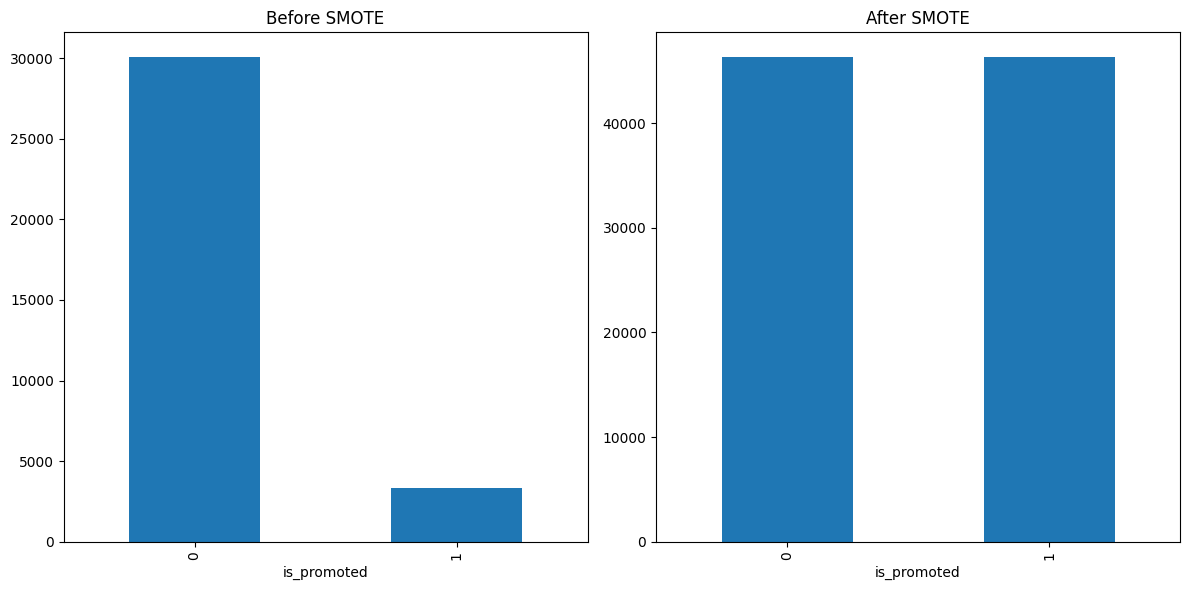

In [38]:
# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
data_cleaned['is_promoted'].value_counts().plot(kind='bar', ax=axes[0], title="Before SMOTE")
resampled_data['is_promoted'].value_counts().plot(kind='bar', ax=axes[1], title="After SMOTE")
plt.tight_layout()

In [39]:
# Save the cleaned and resampled dataset
resampled_data.to_csv('cleaned_resampled_data.csv', index=False)

# Split Data into Traning and Tests

In [40]:
# selected features  
selected_features = ['department', 'education','region', 'avg_training_score', 'length_of_service', 'previous_year_rating']
X_resampled= X_resampled[selected_features]


In [41]:
 #Split the resampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


 # Random Forest Model

In [42]:
# Initialize the Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=950, 
                                    max_depth = 35, min_samples_split = 8,
                                    min_samples_leaf = 1 , max_features= 1.0 , criterion = 'gini')

In [43]:
#Train the classifier
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=35, max_features=1.0, min_samples_split=8,
                       n_estimators=950, random_state=42)

In [44]:

classifier.feature_importances_   
X_resampled.columns
features = pd.DataFrame( classifier.feature_importances_ , index = X_resampled.columns)   
features.head(15)



,0
department,0.070741
education,0.011465
region,0.053310
avg_training_score,0.286720
length_of_service,0.034222
previous_year_rating,0.543542


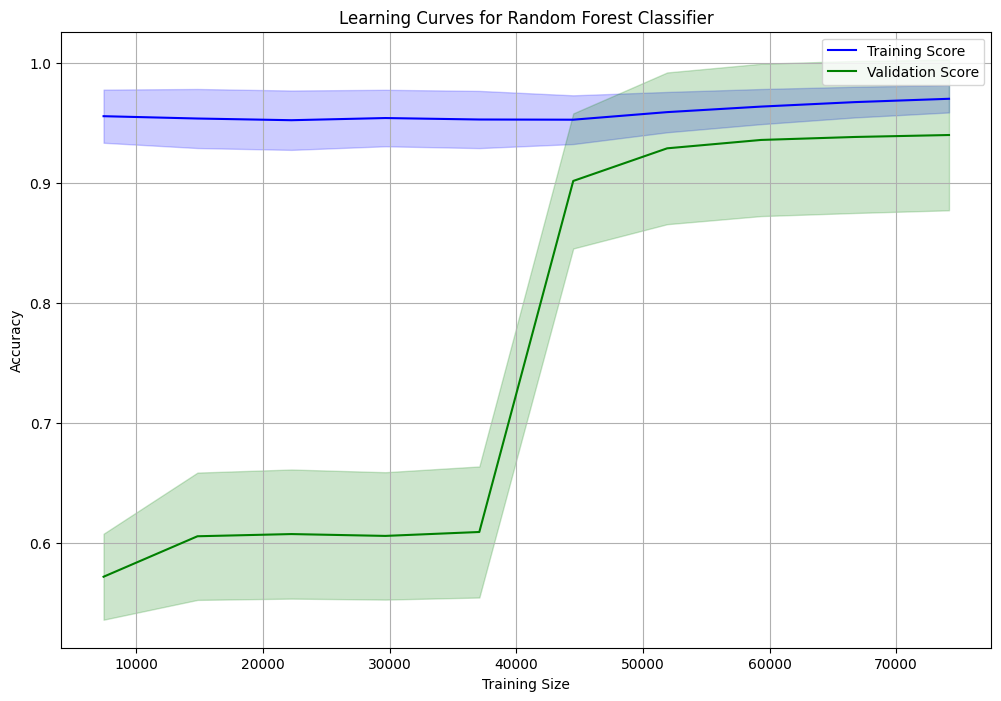

In [45]:
# Generate learning curves

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=classifier,
    X=X_resampled,
    y=y_resampled,
    cv=5,  # Cross-validation folds
    scoring='accuracy',  # Evaluation metric
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training sizes from 10% to 100%
    random_state=42
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, validation_mean, label='Validation Score', color='green')

# Add shaded areas (standard deviation)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.2)

# Customize the plot
plt.title('Learning Curves for Random Forest Classifier')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The code plots learning curves for a Random Forest Classifier using accuracy to assess performance, showing how training size impacts overfitting or underfitting. Shaded areas highlight variability, and the plot is well-customized for clarity.

In [46]:
#Predict on the test data
y_pred = classifier.predict(x_test)

In [47]:
# Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = cross_val_score(
    estimator=classifier, 
    X=X_resampled, 
    y=y_resampled, 
    cv=stratified_kfold, 
    scoring='accuracy'
)

In [48]:
# Results of Cross-Validation
mean_accuracy = np.mean(cv_accuracies)
std_accuracy = np.std(cv_accuracies)
print(f"Cross-Validation Accuracy (Mean): {mean_accuracy:.4f}")
print(f"Cross-Validation Accuracy (Std): {std_accuracy:.4f}")

Cross-Validation Accuracy (Mean): 0.9445
Cross-Validation Accuracy (Std): 0.0007


# Model Evaluation Metrics

In [49]:
#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy_all = accuracy * 100

In [50]:
# Precision
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')

In [51]:
# recall
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
recall_micro = recall_score(y_test, y_pred, average='micro')

In [52]:
#F1-Score
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_micro = f1_score(y_test, y_pred, average='micro')

In [53]:
cm = confusion_matrix(y_test,y_pred)

In [54]:
#Print results fo rAccuracy, Precision ,Recall ,F1-Score.
print("\nPerformance with Selected Features:")
print(f"Accuracy: {accuracy_all:.2f}%\n")
print("Precision:") 
print(f"Macro: {precision_macro:.4f}    Weighted: {precision_weighted:.4f}    Micro: {precision_micro:.4f}\n")

print("Recall:")
print(f"Macro: {recall_macro:.4f}    Weighted: {recall_weighted:.4f}    Micro: {recall_micro:.4f}\n")

print("F1-Score:")
print(f"Macro: {f1_macro:.4f}    Weighted: {f1_weighted:.4f}    Micro: {f1_micro:.4f}")



Performance with Selected Features:
Accuracy: 94.23%

Precision:
Macro: 0.9450    Weighted: 0.9448    Micro: 0.9423

Recall:
Macro: 0.9420    Weighted: 0.9423    Micro: 0.9423

F1-Score:
Macro: 0.9422    Weighted: 0.9422    Micro: 0.9423


# Visualize Matrics

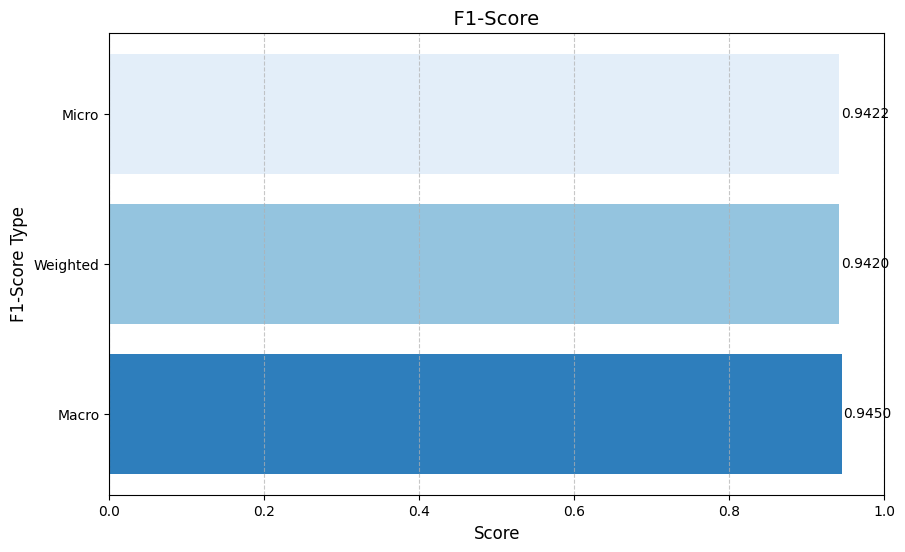

In [55]:
#Visualize  F1-Score:
f1_scores = {
    'Macro': 0.9450 ,     
    'Weighted':   0.9420 ,  
    'Micro':    0.9422      
}

f1_types = list(f1_scores.keys())
f1_values = list(f1_scores.values())

colors = plt.cm.Blues(np.linspace(0.7, 0.1, len(f1_values)))

plt.figure(figsize=(10, 6))
bars = plt.barh(f1_types, f1_values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', fontsize=10)

plt.xlim(0, 1)   
plt.title('  F1-Score  ', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('F1-Score Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

 

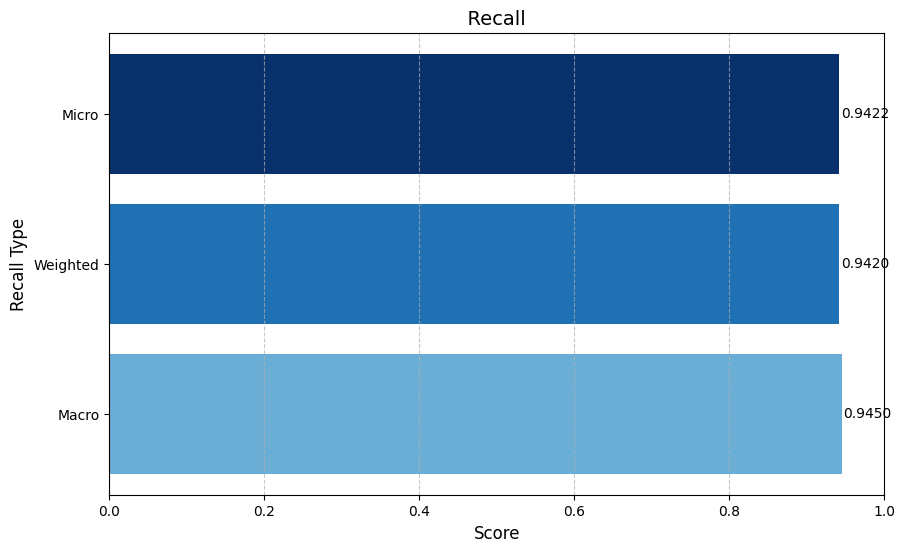

In [56]:
# Visualize Recall 
recall_scores = {
    'Macro': 0.9450 ,     
    'Weighted':   0.9420 ,  
    'Micro':    0.9422      
}

recall_types = list(recall_scores.keys())
recall_values = list(recall_scores.values())

colors = plt.cm.Blues(np.linspace(0.5, 1, len(recall_values)))

plt.figure(figsize=(10, 6))
bars = plt.barh(recall_types, recall_values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', fontsize=10)

plt.xlim(0, 1)   
plt.title('  Recall  ', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Recall Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

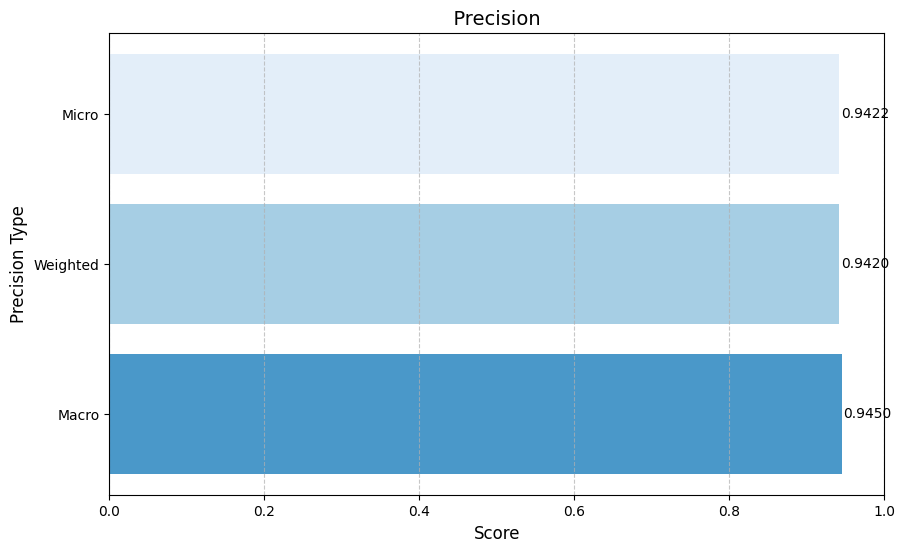

In [57]:
# Visualize Precision 
precision_scores = {
    'Macro': 0.9450 ,     
    'Weighted':   0.9420 ,  
    'Micro':    0.9422        
}

precision_types = list(precision_scores.keys())
precision_values = list(precision_scores.values())

colors = plt.cm.Blues(np.linspace(0.6, 0.1, len(precision_values)))

plt.figure(figsize=(10, 6))
bars = plt.barh(precision_types, precision_values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.4f}', va='center', fontsize=10)

plt.xlim(0, 1)   
plt.title('  Precision  ', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Precision Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

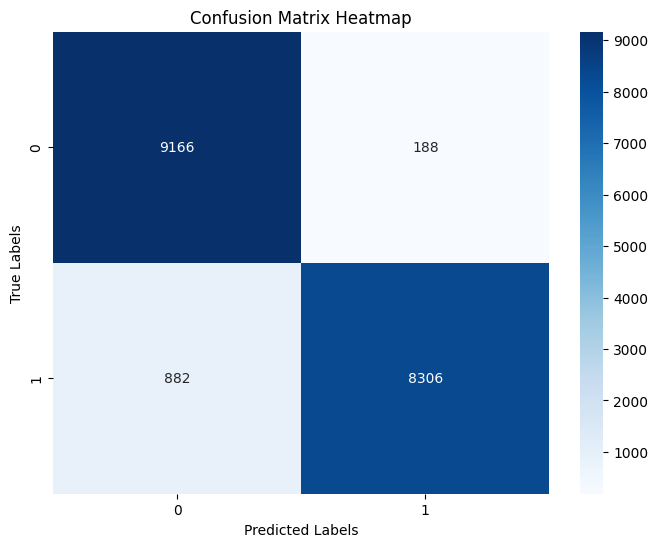

In [58]:
#Visualize relationships between values using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

confusion matrix using a heatmap helps visualize the model's accuracy by comparing the true values with the predicted values. The heatmap shows how correct the predictions are, with values in the main diagonal indicating correct predictions and values outside the diagonal showing errors. This visualization allows for analyzing the model's mistakes and aids in improving it.

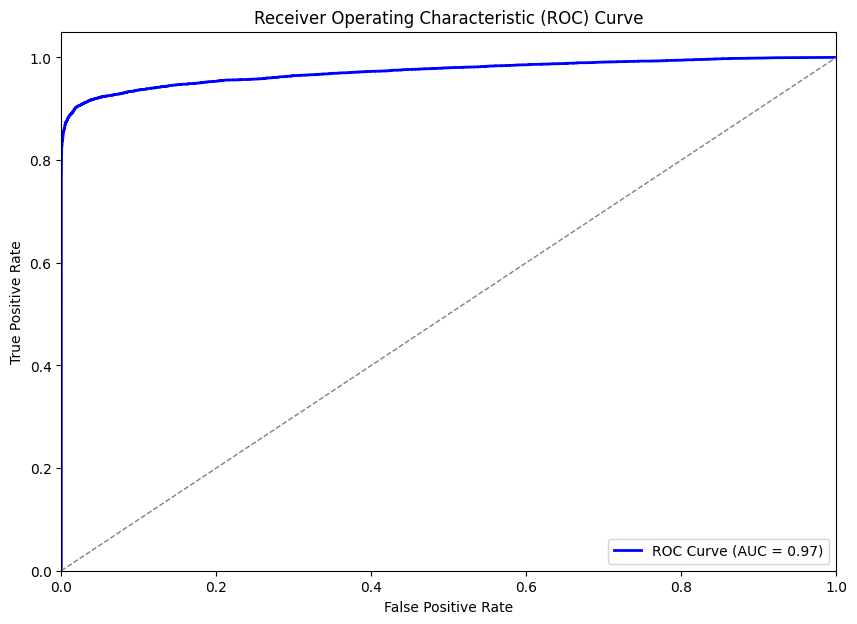

AUC Score: 0.9724


In [59]:
# Get prediction probabilities (focusing on the positive class only)
y_prob = classifier.predict_proba(x_test)[:, 1]  # Extract probability for the positive class

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display the AUC score
print(f"AUC Score: {roc_auc:.4f}")


 This code generates and plots the ROC curve for a classifier, focusing on the positive class probabilities. It calculates the true positive rate (TPR) and false positive rate (FPR) at various thresholds and computes the AUC score to summarize the classifier's performance. The plot includes a diagonal reference line for random performance, making it easy to assess the classifier's effectiveness. The AUC score is also printed for numerical evaluation.

